# Figure 003 (v001)

Chromosome effects heatmaps (supplemental).

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import TypeVar

import janitor  # noqa: F401
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import speclet.plot as sp
from speclet.io import figure_img_file, tables_dir, temp_dir
from speclet.plot.color_pal import (
    lineage_color_pal,
    pal_to_legend_handles,
    sublineage_color_pal,
)

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sp.set_speclet_theme(sp.PlottingMode.DISSERTATION)

In [5]:
FIGNUM, VERSION = 3, 1
FIGURE_FILE = figure_img_file(FIGNUM, VERSION, "cell-chrom-heatmaps")
FIGURE_FILE

PosixPath('/n/data1/hms/dbmi/park/Cook/speclet/figures/figure_003-v001/fig_003-v001_cell-chrom-heatmaps.png')

In [6]:
notebook_output_dir = tables_dir() / "100_106_molecular-cellular-covariates"

### Data

In [7]:
cell_effects = pd.read_csv(notebook_output_dir / "cell-effects.csv")
chrom_effects = pd.read_csv(notebook_output_dir / "chromosome-effects.csv")
sublineage_pal = sublineage_color_pal()
lineage_pal = lineage_color_pal()

In [8]:
sex_chrom_effects = pd.read_csv(notebook_output_dir / "sex-chromosome-differences.csv")

In [9]:
cell_effects_tp53 = pd.read_csv(notebook_output_dir / "tp53-mutation-effects.csv")
tp53_data = pd.read_csv(notebook_output_dir / "tp53-mutation-data.csv")

## Figure

### Shared

In [10]:
FIGSIZE = (6.5, 6)
HEIGHT_RATIOS = (5, 5, 1)
figure = plt.figure(constrained_layout=True, figsize=FIGSIZE)
subfigures = figure.subfigures(
    nrows=3, ncols=1, squeeze=True, height_ratios=HEIGHT_RATIOS
)

panel_a = subfigures[0]
panel_b = subfigures[1]
legend_panel = subfigures[2]

<Figure size 650x600 with 0 Axes>

### a. Joint intercept and CN slope for cell lines

In [11]:
panel_a.clear()
panel_a.text(0, 0.96, "a", fontsize=8, fontweight="bold")
panel_b.clear()
panel_b.text(0, 0.96, "b", fontsize=8, fontweight="bold")
ax_a = panel_a.subplots()
ax_b = panel_b.subplots()


cg_size = (FIGSIZE[0], FIGSIZE[1] * HEIGHT_RATIOS[0] / sum(HEIGHT_RATIOS))

for var_name, ax in zip(["k", "m"], [ax_a, ax_b]):
    print(f"variable: '{var_name}'")
    cell_chrom_X = (
        chrom_effects.query(f"var_name == '{var_name}'")
        .pivot_wider(["sgrna_target_chr"], names_from="depmap_id", values_from="mean")
        .set_index("sgrna_target_chr")
    )

    cell_chrom_col_colors = (
        chrom_effects[["depmap_id", "lineage", "lineage_subtype"]]
        .drop_duplicates()
        .set_index("depmap_id")
        .assign(
            lineage=lambda d: d["lineage"].map(lineage_pal),
            lineage_subtype=lambda d: d["lineage_subtype"].map(sublineage_pal),
        )
        .rename(columns={"lineage_subtype": "subtype"})
        .drop(columns=["subtype"])
    )

    cg = sns.clustermap(
        cell_chrom_X,
        cmap="seismic",
        z_score=1,
        center=0,
        figsize=cg_size,
        yticklabels=1,
        col_colors=cell_chrom_col_colors,
        xticklabels=False,
        dendrogram_ratio=(0.05, 0.1),
        cbar_pos=(-0.03, 0.25, 0.015, 0.3),
    )
    cg.ax_heatmap.set_xlabel("cell line")
    cg.ax_heatmap.set_ylabel("chromsome", rotation=270, va="bottom")
    cg.ax_cbar.set_title(f"${var_name}$", fontsize=6)
    cg.ax_cbar.tick_params(labelsize=6, pad=1)

    temp_fp = temp_dir() / f"temp-chromosome-heatmap-plot_{var_name}.png"
    cg.savefig(temp_fp, dpi=400, pad_inches=0)
    plt.close(cg.figure)

    ax.imshow(plt.imread(temp_fp))
    ax.set_axis_off()

variable: 'k'


/home/jc604/.conda/envs/speclet/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


variable: 'm'


/home/jc604/.conda/envs/speclet/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [12]:
_T = TypeVar("_T")


def _sort_dict(d: dict[str, _T]) -> dict[str, _T]:
    keys = list(d.keys())
    keys.sort(key=lambda v: v.upper())
    new_d = {}
    for k in keys:
        new_d[k] = d[k]
    return new_d

In [13]:
legend_panel.clear()
leg_ax = legend_panel.subplots()

leg_kwargs = {
    "columnspacing": 0.5,
    "handletextpad": 0.3,
    "labelspacing": 0,
    "loc": "center",
    "fontsize": 6,
}

lineage_pal_mod = lineage_pal.copy()
lineage_pal_mod["CNS"] = lineage_pal_mod.pop("central nervous system")
lineage_pal_mod["PNS"] = lineage_pal_mod.pop("peripheral nervous system")
lineage_pal_mod = _sort_dict(lineage_pal_mod)
leg_ax.legend(
    handles=pal_to_legend_handles(lineage_pal_mod, lw=0, marker="s", markersize=2),
    title="lineage",
    ncol=5,
    **leg_kwargs,
)
leg_ax.axis("off")

(0.0, 1.0, 0.0, 1.0)

## Saving

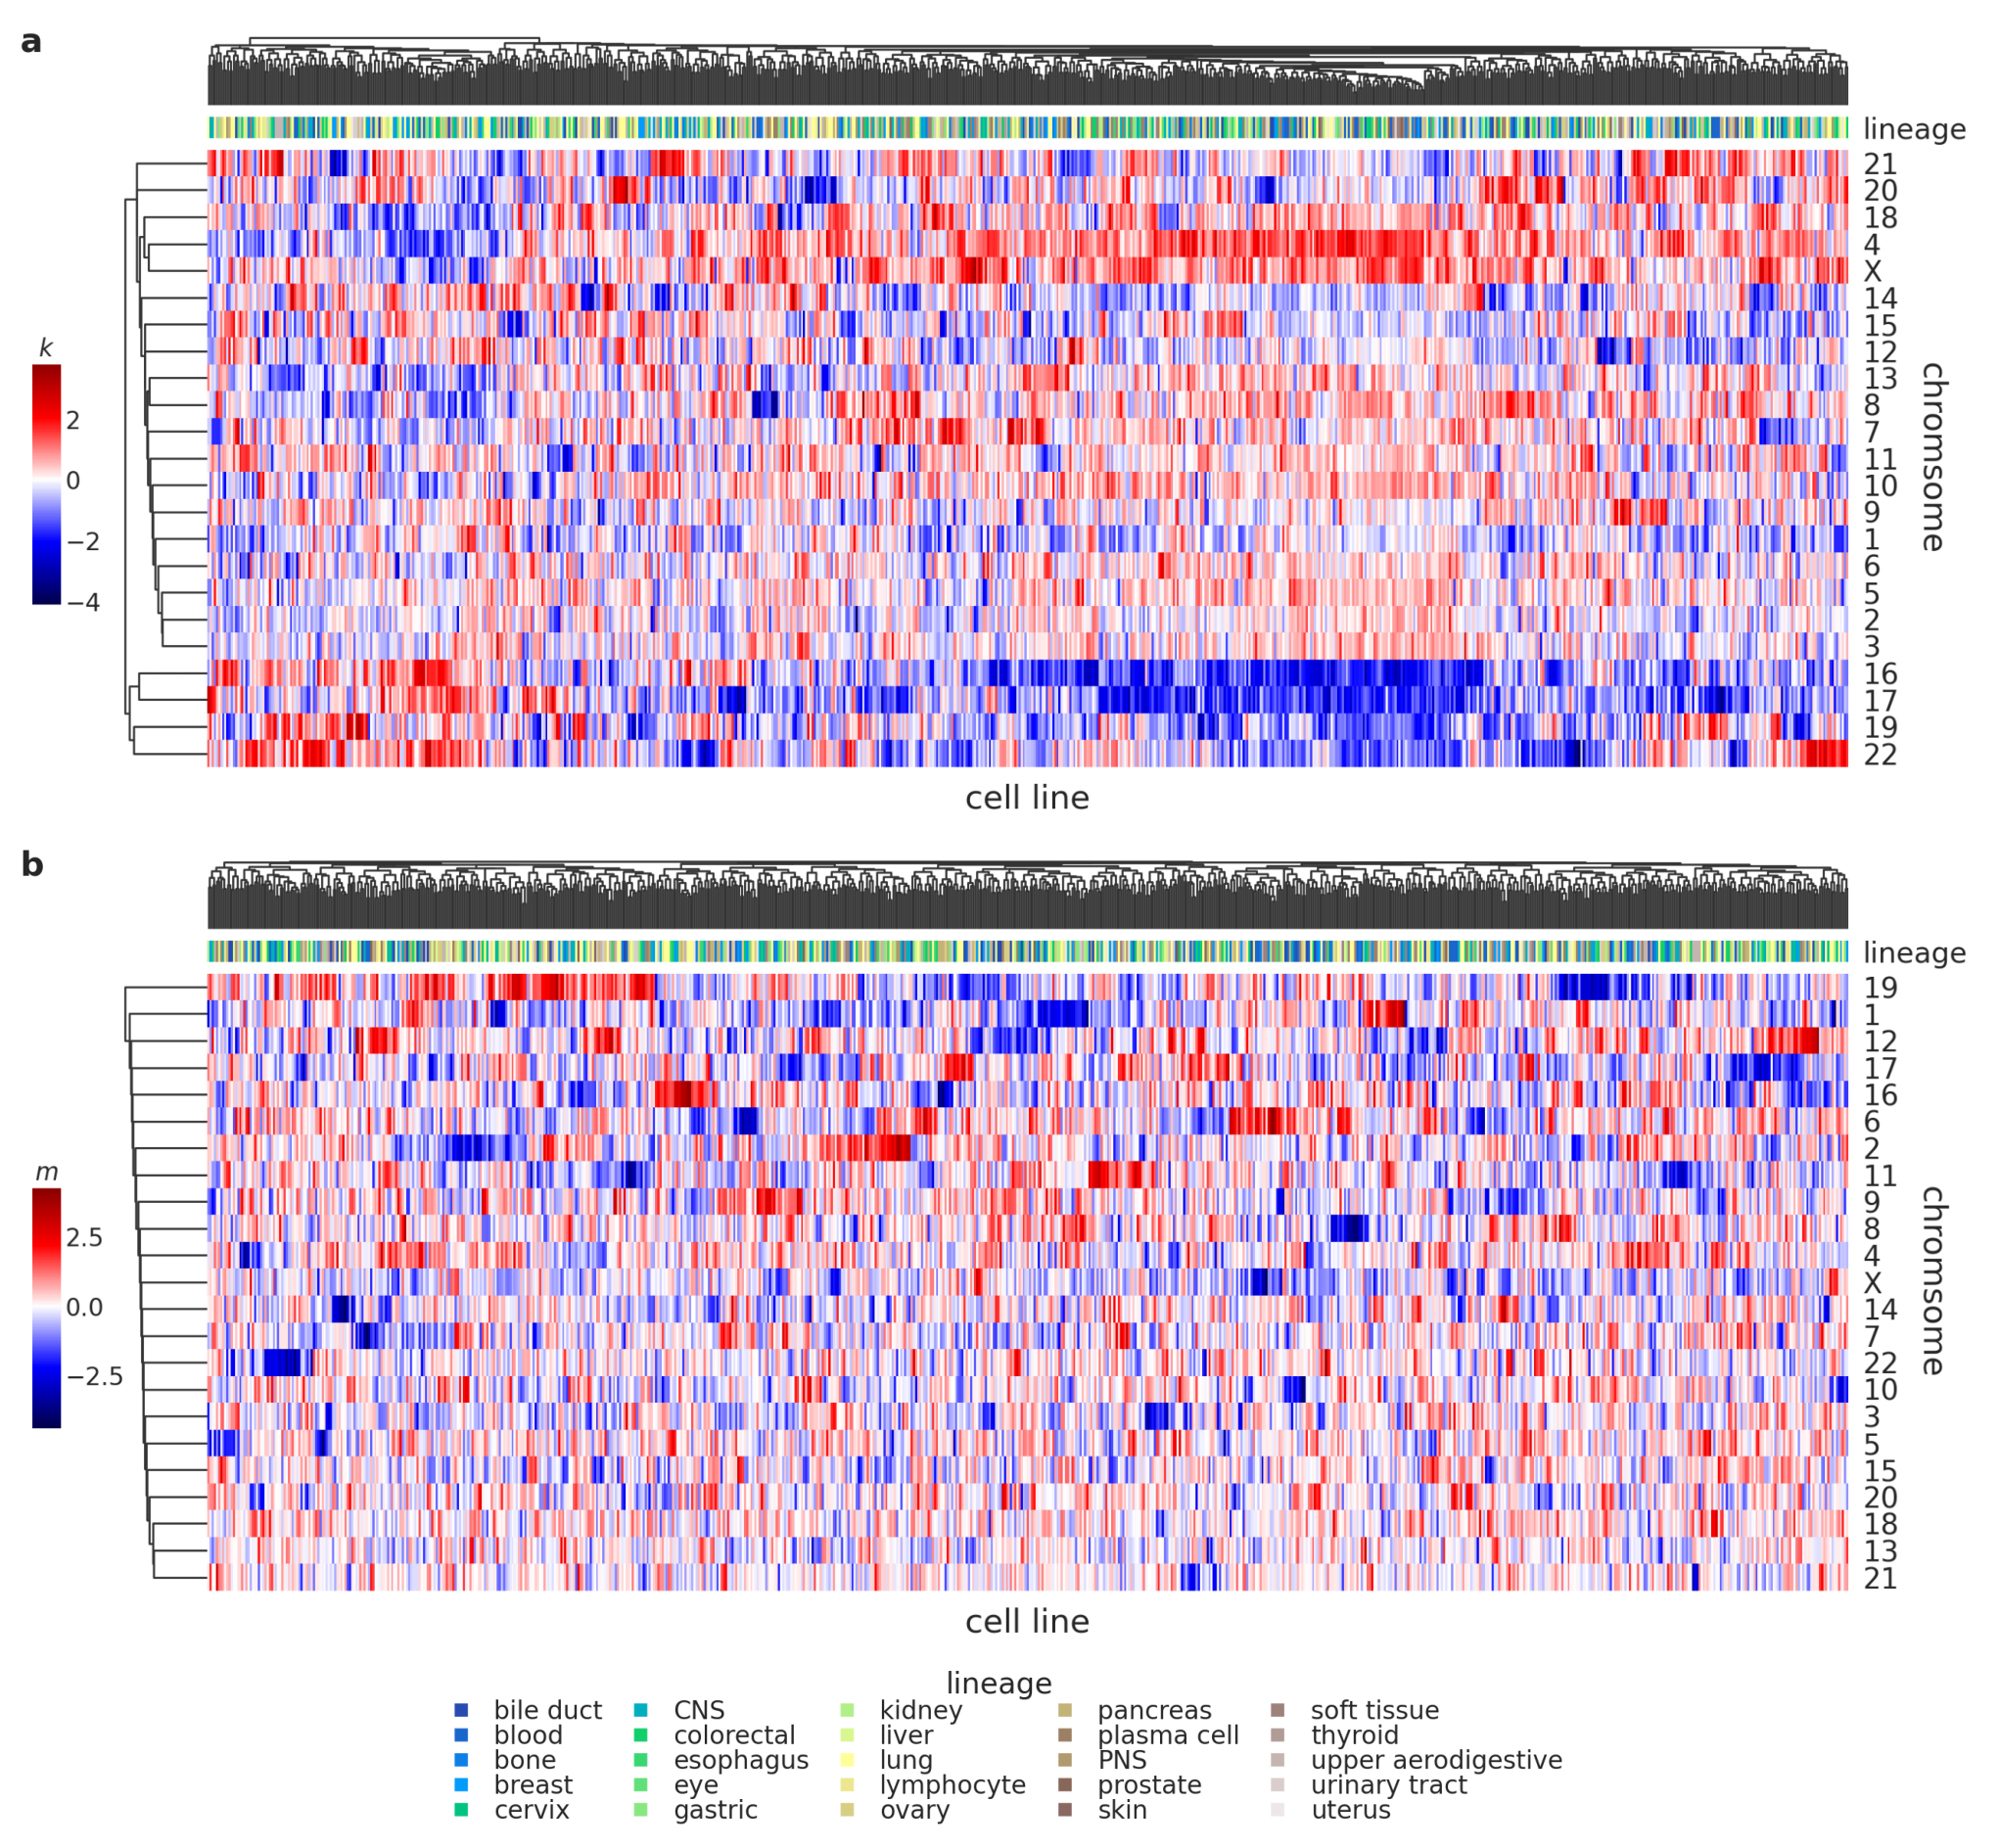

In [14]:
figure.savefig(FIGURE_FILE, dpi=400, pad_inches=0)

_, ax = plt.subplots(figsize=[x * 2 for x in FIGSIZE])
ax.imshow(plt.imread(FIGURE_FILE))
ax.axis("off")
plt.show()

---

## Session Info

In [15]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-10-04

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 3.10.0-1160.76.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 28
Architecture: 64bit

Hostname: compute-e-16-231.o2.rc.hms.harvard.edu

Git branch: figures

speclet   : 0.0.9000
matplotlib: 3.5.3
pandas    : 1.4.4
janitor   : 0.22.0
seaborn   : 0.11.2

